In [2]:
!pip install fastai2
!pip install fastcore

In [19]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastai2.imports import *

In [20]:
import fastai2
fastai2.__version__

'0.0.30'

In [21]:
import fastcore
fastcore.__version__

'1.3.10'

In [22]:
tits_types = 'small', 'big'
path = Path('dataset/tits')

In [23]:
fns = get_image_files(path)
fns

(#156) [Path('dataset/tits/big/Image_76.jpg'),Path('dataset/tits/big/Image_97.jpg'),Path('dataset/tits/big/Image_91.jpg'),Path('dataset/tits/big/Image_78.jpg'),Path('dataset/tits/big/Image_88.jpg'),Path('dataset/tits/big/Image_93.jpg'),Path('dataset/tits/big/Image_33.jpg'),Path('dataset/tits/big/Image_73.jpg'),Path('dataset/tits/big/Image_4.jpg'),Path('dataset/tits/big/Image_10.jpg')...]

In [24]:
failed = verify_images(fns)
failed

(#0) []

In [25]:
failed.map(Path.unlink);

In [26]:
tits = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [27]:
dls = tits.dataloaders(path)

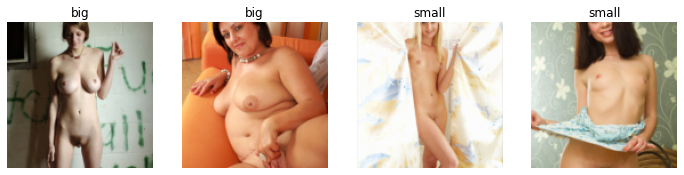

In [28]:
dls.valid.show_batch(max_n=4, nrows=1)

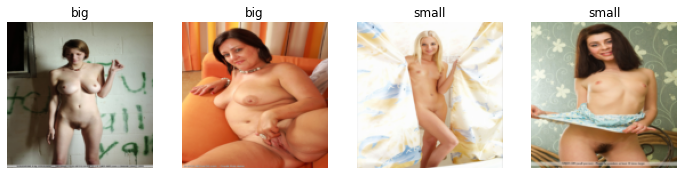

In [29]:
tits = tits.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = tits.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
tits = tits.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = tits.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

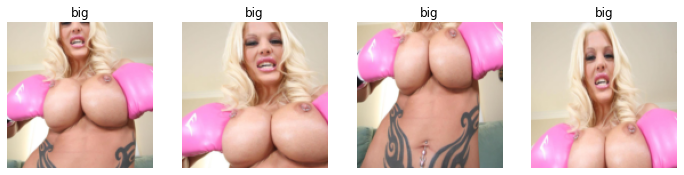

In [24]:
tits = tits.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = tits.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

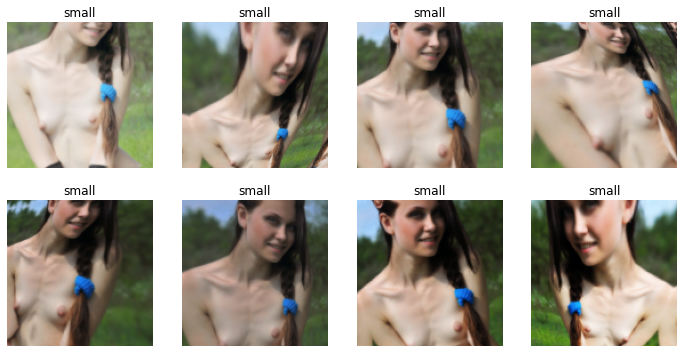

In [30]:
tits = tits.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = tits.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [31]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.369451,1.512215,0.673913,00:11


epoch,train_loss,valid_loss,error_rate,time
0,1.244671,1.427384,0.608696,00:13
1,1.153978,0.888853,0.347826,00:14
2,1.024842,0.562902,0.369565,00:13
3,0.965550,0.445808,0.260870,00:13


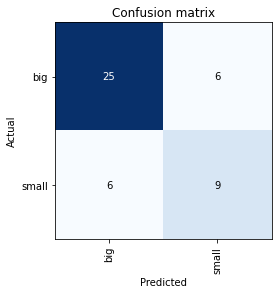

In [32]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

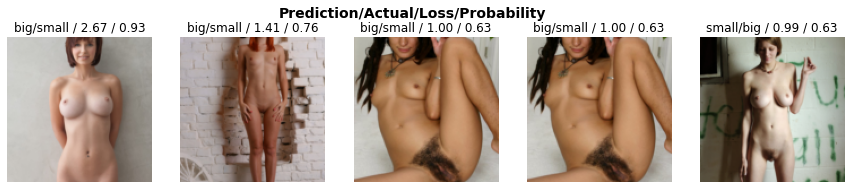

In [33]:
interp.plot_top_losses(5, nrows=1)

In [34]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [36]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
#for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/tits/small/Image_29.jpg'

In [37]:
learn.export()

In [38]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [39]:
learn_inf = load_learner(path/'export.pkl')

In [40]:
learn_inf.predict('dataset/predict/image.jpg')

('big', tensor(0), tensor([0.7520, 0.2480]))

In [41]:
learn_inf.dls.vocab

['big', 'small']

In [42]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [43]:
btn_upload = SimpleNamespace(data = ['dataset/predict/image.jpg'])

In [44]:
img = PILImage.create(btn_upload.data[-1])

In [45]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [46]:
pred,pred_idx,probs = learn_inf.predict(img)

In [47]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: big; Probability: 0.7520')

In [48]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [49]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [50]:
btn_upload = widgets.FileUpload()

In [51]:
VBox([widgets.Label('Select your tits!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [55]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

Enabling: voila
- Writing config: /opt/conda/etc/jupyter
    - Validating...
      voila 0.2.4 OK
